## 훈련과정 : R·파이썬 기반 빅데이터 분석 전문가 양성과정
- 교과목 평가 : 빅데이터 분석결과 시각화
- 성명 : 용광순
- 점수 : 60

#### Q1. 'auto-mpg.csv' 데이터셋을 df 이름으로 불러온 후 아래 사항을 수행하세요. --- (10점)
- df.columns = ['mpg','cylinders','displacement','horsepower','weight','model year','origin','name']
- mpg , cylinders, weight, displacement, acceleration 칼럼만을 선택해서 df_s 이름으로 저장하고 처음 5개행을 출력하세요.
- df_s에서 mpg와 각 칼럼간의 산점도를 그리고 음의 상관관계가 있는 변수를 기술하세요. (정답 : weight, displacement)

,mpg,cylinders,weight,displacement,acceleration
0,18.0,8,3504.0,307.0,12.0
1,15.0,8,3693.0,350.0,11.5
2,18.0,8,3436.0,318.0,11.0
3,16.0,8,3433.0,304.0,12.0
4,17.0,8,3449.0,302.0,10.5


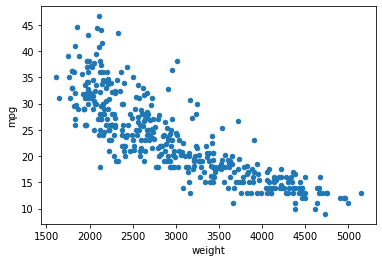

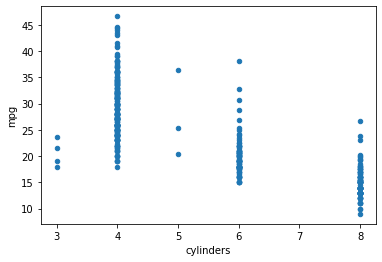

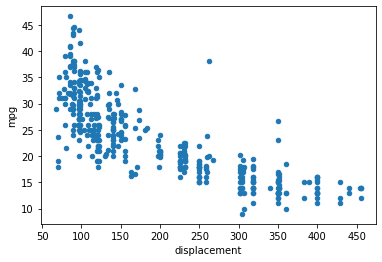

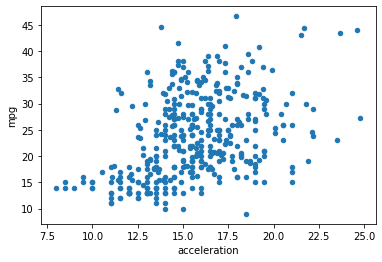

In [1]:
import pandas as pd

df = pd.read_csv('auto-mpg.csv', header=None)
df.columns = ['mpg','cylinders','displacement','horsepower','weight', 'acceleration', 'model year','origin','name']
df_s = df[['mpg' , 'cylinders', 'weight', 'displacement', 'acceleration']]

display(df_s.head())

df_s.plot(x='weight', y='mpg', kind='scatter')
df_s.plot(x='cylinders', y='mpg', kind='scatter')
df_s.plot(x='displacement', y='mpg', kind='scatter')
df_s.plot(x='acceleration', y='mpg', kind='scatter')

#### Q2. df_s의 각 컬럼간의 상관관계에 대한 시각화를 아래와 같이 수행하세요.  --- (20점)
- 2개의 행과 2개의 열을 가진 subplots를 이용해서 표현
- Seaborn의 regplot을 이용해 산점도와 선형 회귀 직선을 함께 표현

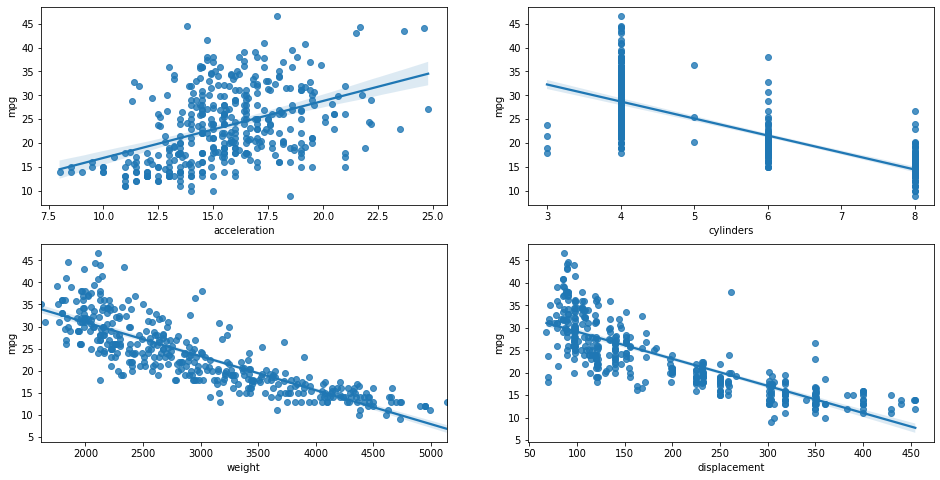

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

fig, axs = plt.subplots(figsize=(16, 8), ncols=2, nrows=2)
lm_features = ['acceleration', 'cylinders', 'weight', 'displacement']
for i, feature in enumerate(lm_features):
    row = int(i / 2)
    col = i % 2
    
    sns.regplot(x=feature, y='mpg', data=df_s, ax=axs[row][col])

#### Q3. auto_mpg.csv 파일을 df 이름으로 불러와서 horsepower열에 대한 히스토그램을 그린 후 출력하세요. ---(20점)
df.columns = ['mpg','cylinders','displacement','horsepower','weight',
              'acceleration','model year','origin','name']

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,name
0,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
1,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
2,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
3,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
4,15.0,8,429.0,198.0,4341.0,10.0,70,1,ford galaxie 500


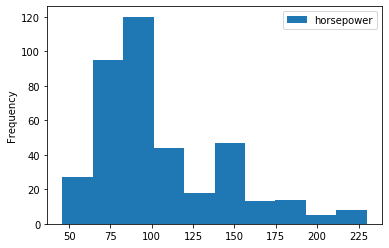

In [35]:
import pandas as pd
import numpy as np

df = pd.read_csv('auto-mpg.csv')
df.columns = ['mpg','cylinders','displacement','horsepower','weight', 'acceleration','model year','origin','name']

display(df.head())

df_h = df.loc[:,['horsepower']]
df_h.replace('?', np.nan, inplace=True)
df_h.dropna(subset=['horsepower'], axis=0, inplace=True)
df_h.isnull().sum()
df_h=df_h.astype(float)

df_h.plot(kind='hist')

#### Q4. 아래 사항을 준수하여 막대 그래프(barplot)를 출력하세요. --- (10점)
- Seaborn 제공 데이터셋 가져오기 : titanic = sns.load_dataset('titanic')
- sns.barplot 이용
- 스타일 테마 설정 : sns.set_style('whitegrid')
- 그래프 객체 생성 : figure에 3개의 서브 플롯을 생성
- x축, y축에 변수 할당 : x='sex', y='survived', data=titanic, ax=ax1
- x축, y축에 변수 할당하고 hue 옵션 추가 : x='sex', y='survived', hue='class', data=titanic, ax=ax2
- x축, y축에 변수 할당하고 hue 옵션을 추가하여 누적 출력 : x='sex', y='survived', hue='class', dodge=False, data=titanic, ax=ax3
- 차트 제목 표시\
ax1.set_title('titanic survived - sex')\
ax2.set_title('titanic survived - sex/class')\
ax3.set_title('titanic survived - sex/class(stacked)')

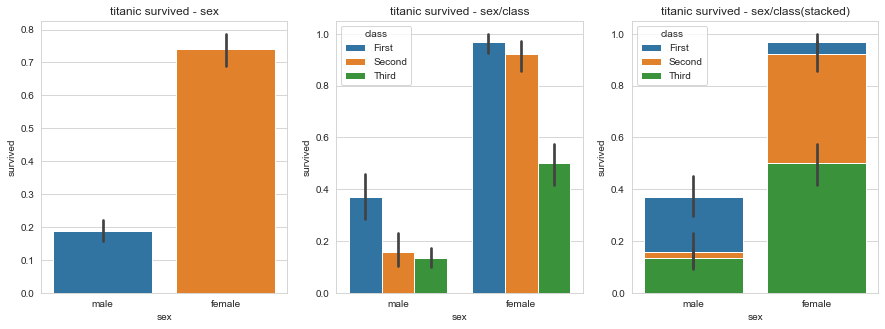

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Seaborn 제공 데이터셋 가져오기
titanic = sns.load_dataset('titanic')

# 스타일 테마 설정
sns.set_style('whitegrid')

# 그래프 객체 생성 (figure에 3개의 서브 플롯을 생성)
fig = plt.figure(figsize = (15, 5))
ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2)
ax3 = fig.add_subplot(1, 3, 3)

sns.barplot(x='sex',         # x축 변수
           y='survived',     # y축 변수
           data=titanic,     # 데이터
           ax=ax1)

sns.barplot(x='sex',         # x축 변수
           y='survived',     # y축 변수
           data=titanic,     # 데이터
           hue='class',
           ax=ax2)

sns.barplot(x='sex',         # x축 변수
           y='survived',     # y축 변수
           data=titanic,     # 데이터
           hue='class',
           dodge=False,
           ax=ax3)

ax1.set_title('titanic survived - sex')
ax2.set_title('titanic survived - sex/class')
ax3.set_title('titanic survived - sex/class(stacked)')

plt.show()

#### Q5. 아래 사항을 준수하여 빈도 그래프(countplot)를 출력하세요. --- (20점)
- Seaborn 제공 데이터셋 가져오기 : titanic = sns.load_dataset('titanic')
- sns.countplot 이용
- 스타일 테마 설정 : sns.set_style('whitegrid')
- 그래프 객체 생성 : figure에 3개의 서브 플롯을 생성
- 기본값 : x='class', palette='Set1', data=titanic, ax=ax1
- hue 옵션에 'who' 추가  : x='class', hue='who', palette='Set2', data=titanic, ax=ax2
- dodge=False 옵션 추가 : x='class', hue='who', palette='Set3', dodge=False, data=titanic, ax=ax3
- 차트 제목 표시\
ax1.set_title('titanic class')\
ax2.set_title('titanic class - who')\
ax3.set_title('titanic class - who(stacked)')

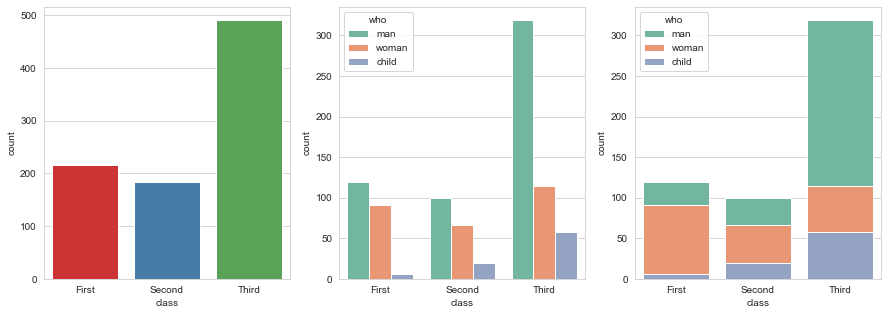

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Seaborn 제공 데이터셋 가져오기
titanic = sns.load_dataset('titanic')

# 스타일 테마 설정
sns.set_style('whitegrid')

# 그래프 객체 생성 (figure에 3개의 서브 플롯을 생성)
fig = plt.figure(figsize = (15, 5))
ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2)
ax3 = fig.add_subplot(1, 3, 3)

sns.countplot(x='class',
            palette='Set1',
            data=titanic,
            ax=ax1)

sns.countplot(x='class',
            hue='who',
            palette='Set2',
            data=titanic,
            ax=ax2)

sns.countplot(x='class',
            hue='who',
            palette='Set2',
            data=titanic,
            dodge=False,
            ax=ax3)

plt.show()

#### Q6. 타이타닉 생존자 예측 모델 개발을 위한 최종 선정 변수와 그 이유를 논하세요. ---(20점)
- titanic3 분석용 데이터에 대한 탐색적 분석 결과 반영

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


'상단 표 : 기본데이터'

,pclass,survived,sex,age,sibsp,parch,fare,cabin,embarked
0,1,1,0,29.000000,0,0,211.3375,1,3
1,1,1,1,0.920000,1,2,151.5500,2,3
2,1,0,0,2.000000,1,2,151.5500,2,3
3,1,0,1,30.000000,1,2,151.5500,2,3
4,1,0,0,25.000000,1,2,151.5500,2,3
...,...,...,...,...,...,...,...,...,...
1304,3,0,0,14.500000,1,0,14.4542,7,0
1305,3,0,0,29.881138,1,0,14.4542,7,0
1306,3,0,1,26.500000,0,0,7.2250,7,0
1307,3,0,1,27.000000,0,0,7.2250,7,0


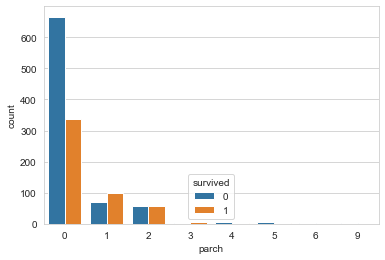

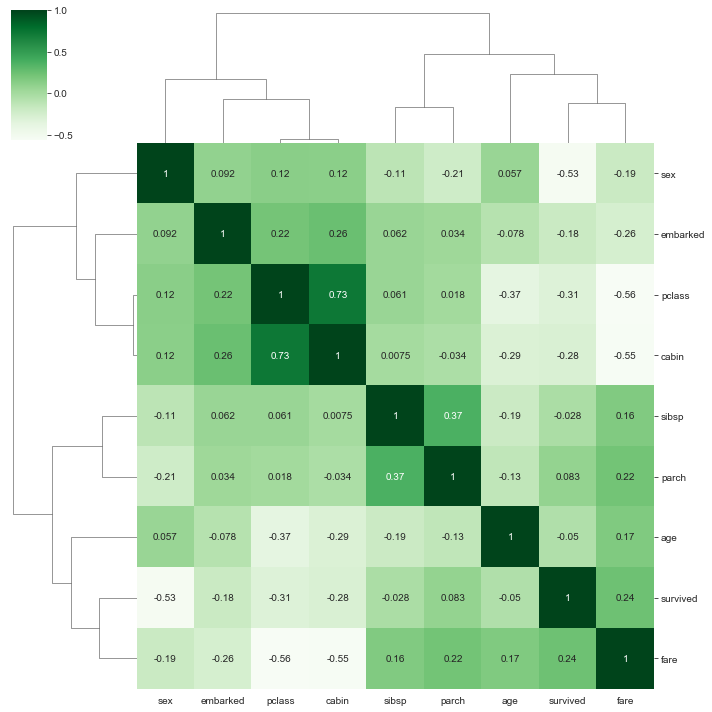

In [44]:
import pandas as pd

titanic_df = pd.read_csv('titanic3.csv')

titanic_df.head()

from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore") # , category=FutureWarning 생략

# 데이터 정보
# Pclass Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
# survival Survival (0 = No; 1 = Yes)
# name Name
# sex Sex
# age Age
# sibsp Number of Siblings/Spouses Aboard
# parch Number of Parents/Children Aboard
# ticket Ticket Number
# fare Passenger Fare (British pound)
# cabin Cabin
# embarked Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)
# boat Lifeboat
# body Body Identification Number
# home.dest Home/Destination

titanic_df = pd.read_csv('titanic3.csv')

display(titanic_df.head(),'상단 표 : 기본데이터')
# display(titanic_df.info(),'INFORMATION')
def fillna(df):
    df['age'].fillna(df['age'].mean(), inplace=True)
    df['cabin'].fillna('N', inplace=True)
    df['fare'].fillna(df['fare'].mean(), inplace=True)
    df['embarked'].fillna('N', inplace=True)
    return df

def drop_features(df):
    df.drop(['home.dest','boat','body','name','ticket'], axis=1, inplace=True)
    return df

def format_features(df):
    df['cabin'] = df['cabin'].str[:1]
    features = ['cabin','sex','embarked']
    for feature in features:
        le = LabelEncoder()
        df[feature] = le.fit_transform(df[feature])
    return df

def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df


transform_features(titanic_df) # 메소드 호출 및 실행
f_plot=sns.countplot(x='parch',hue='survived', data=titanic_df)
f_plot
display(titanic_df)

sns.clustermap(titanic_df.corr(), metric="correlation",annot=True, cmap='Greens')